In [228]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

открываем датасет и сразу его разбиваем:

In [229]:
df=pd.read_table('semeion.data',delimiter = r"\s+",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


отделяем лейблы от самих данных:

In [230]:
labels = pd.DataFrame(df.iloc[:,[256,257,258,259,260,261,262,263,264,265]])
X = df.drop([256,257,258,259,260,261,262,263,264,265], axis=1)

маппим лейблы на ту цифру,которые они под собой скрывают и добавляем к датасету лейблов столбцом y:

In [231]:
labels.rename(columns={256:0, 257:1, 258:2, 259:3, 260:4, 261:5, 262:6, 263:7, 264:8, 265:9 }, inplace=True)
labels['y'] = labels.apply(lambda x: labels.columns[x.idxmax()], axis = 1)

In [232]:
labels.tail()

,0,1,2,3,4,5,6,7,8,9,y
1588,0,0,0,0,0,0,0,0,0,1,9
1589,0,0,0,0,0,0,0,0,0,1,9
1590,0,0,0,0,0,0,0,0,0,1,9
1591,0,0,0,0,0,0,0,0,0,1,9
1592,0,0,0,0,0,0,0,0,0,1,9


In [233]:
Y=labels['y']

Преобразуем наши датасеты к нумпаевским массивам для удобства и быстроты:

In [262]:
X=np.array(X)
Y=np.array(Y)

Делаем небольшую функцию,чтобы рисовать то,что у нас в датасете:

In [263]:
def getImage(index,action='show'):
    if action=='comparison':
        print("Actually it's",Ytest[index])
        print("Predicted it's",result[index])
        plt.imshow(Xtest[index].reshape(16,16))
    else:
        print("Actually it's",Y[index])
        plt.imshow(X[index].reshape(16,16))
    return

Actually it's 5


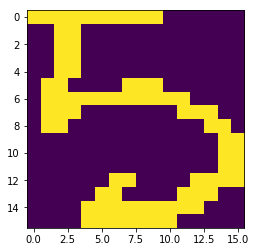

In [236]:
getImage(300)

**Поехали с Knn:**

In [237]:
Xtrain,Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

In [238]:
clf_knn = KNeighborsClassifier()

In [239]:
clf_knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [240]:
result=clf_knn.predict(Xtest)

Забахаем матрицу несоответствий (даже комментировать не буду зачем) и высчитаем точность сделанной модели:

In [241]:
cm = confusion_matrix(Ytest,result)

Text(69,0.5,'Actual')

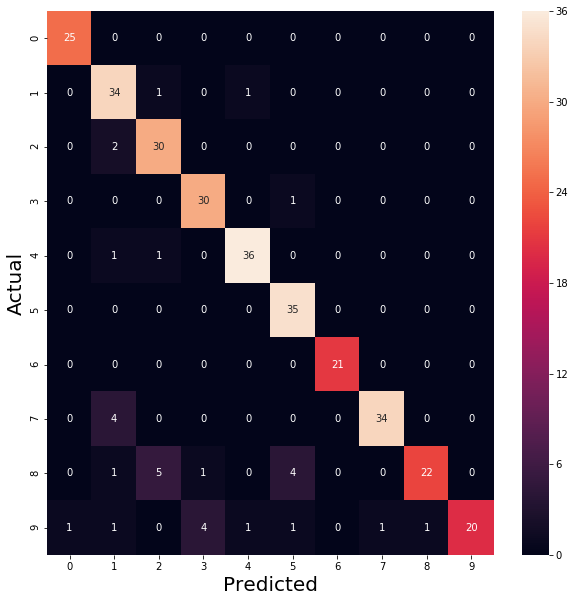

In [242]:
labels = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,10))

sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

Считаем:

1) **precision** (True Positive/(True Postive+True Negative)-способность отличать один класс от других

2) **recall** (finded count True Positive/all count of relevant elements) -демонстрирует способность алгоритма обнаруживать данный класс вообще

3) **accuracy**-так как самая очевидная 

4) **Fbeta** (beta-вес точности в метрике) - среднее гармоническое precision и recal

In [243]:
scr_clf_knn = precision_recall_fscore_support(Ytest,result, average='weighted')
print ("classifier's precision: "+str(scr_clf_knn[0]) )
print ("classifier's recall: "+str(scr_clf_knn[1]) )
print ("classifier's fbeta_score: "+str(scr_clf_knn[2]) )
print("classifier's accuracy: "+ str(accuracy_score(Ytest, result)))

classifier's precision: 0.9102774426990085
classifier's recall: 0.8996865203761756
classifier's fbeta_score: 0.8967640270842244
classifier's accuracy: 0.8996865203761756


Нет,ну в целом неплохо-то вообще,но это не предел ведь,время тюнить:

In [244]:
knn_params = {'n_neighbors': np.arange(1, 10), 'weights':['uniform','distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}

In [245]:
knn_grid = GridSearchCV(clf_knn, knn_params,n_jobs=-1,cv=5)

In [246]:
knn_grid.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [247]:
knn_grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance'}

In [248]:
knn_grid.best_score_

0.9152276295133438

Ну вот теперь совсем хорошо,фиттим и смотрим на результаты:

In [258]:
result=knn_grid.predict(Xtest)

Выискиваем индексы,где предсказали неверно и нарисуем парочку:

In [259]:
wrongPredictions=np.where(Ytest!=result)
wrongPredictions

(array([ 21,  46,  70,  79,  87,  90, 100, 126, 145, 152, 157, 159, 172,
        176, 195, 232, 237, 244, 252, 255, 277, 280, 286, 295, 300]),)

**То,что не вышло:**

Actually it's 9
Predicted it's 5


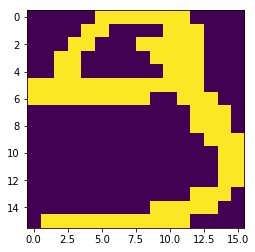

In [267]:
getImage(21,'comparison')

Actually it's 8
Predicted it's 2


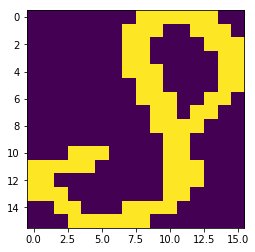

In [269]:
getImage(300,'comparison')

**То,что получилось:**

Actually it's 8
Predicted it's 8


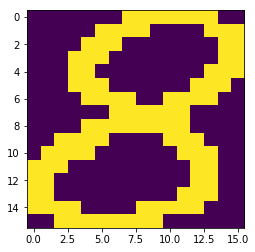

In [270]:
getImage(1,'comparison')

Actually it's 2
Predicted it's 2


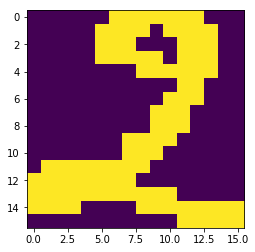

In [271]:
getImage(27,'comparison')